In [141]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

*PART O - Motivation*
The IT sector has always been a growing sector. For years now, it seems that there are never enough programmers and the job offers are very attractive. The covid-19 pandemic highlighted the need for more development profiles. Was this reflected in the annual surveys conducted in the following years by one of the most important developer communities on the internet?
*PARTE 0 - Motivación*
El sector IT siempre ha sido un sector creciente. Desde hace años, parece que nunca hay suficientes programadores y las ofertas de trabajo son muy llamativas. La pandemia del covid-19 puso de manifiesto la necesidad de más perfiles de desarrollo. ¿Se reflejó esto en las encuestas anuales realizadas los años siguientes, por una de las comunidades de desarrolladores más importantes de internet?

*PART 1 - READING, CLEANING AND PREPARING DATA*
*PARTE 1 - Leer, limpiar y preparar los datos*

In [142]:
#I create some filters of my interest that will be used later on our code.
time_filter = '(YearsCodePro == "Less than 1 year")'
time_filter_noob = '(YearsCode == "Less than 1 year")'
time_gender_filter = '(Gender == "Man" and YearsCodePro== "Less than 1 year")'
employment_filter = '(Employment == "Employed full-time" and Employment == "Independent contractor, freelancer, or self-employed" and Employment=="Employed part-time")

SyntaxError: unterminated string literal (detected at line 5) (3083047266.py, line 5)

*DATASET FROM 2019*

In [265]:
#Read and check first rows of the survey from 2019
df_2019raw = pd.read_csv('2019_survey_results_public.csv')
df_2019raw.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [ ]:
#Check basic info of the dataset - Number of columns and rows in the 2019 dataset
print ('2019 Dataset', '\nRows:',df_2019raw.shape[0],'\nColumns:',df_2019raw.shape[1])

In [5]:
#Check basic info of the dataset - Detailed information
df_2019raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [6]:
#Clean the data of 2019. We take just the columns that will answer to our questions and clean the missing values.
df_2019 = df_2019raw[['MainBranch','Age', 'YearsCode','YearsCodePro','Gender','OrgSize','WorkRemote']]

#I filter for the responses containing 'I am' and 'developer', because those who have a work related to development
# answered 'I am a developer by profession' and 'I am not primarly a developer, but I write code as a part of my job'
df_2019dev = df_2019[df_2019['MainBranch'].str.contains("developer" and "I am", na = False)]

#Clean NaN values
df_2019dev = df_2019dev.dropna(axis=0)

#Print first rows to check data consistency
df_2019dev.head()


,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize,WorkRemote
2,"I am not primarily a developer, but I write co...",28.0,3,1,Man,100 to 499 employees,Less than once per month / Never
3,I am a developer by profession,22.0,3,Less than 1 year,Man,100 to 499 employees,Less than once per month / Never
4,I am a developer by profession,30.0,16,9,Man,"10,000 or more employees",A few days each month
6,I am a developer by profession,42.0,6,4,Man,"Just me - I am a freelancer, sole proprietor, ...",All or almost all the time (I'm full-time remote)
8,I am a developer by profession,23.0,12,4,Man,10 to 19 employees,Less than once per month / Never


*DATASET FROM 2020*

In [7]:
#Read and check first rows of the survey from 2019
df_2020raw = pd.read_csv('2020_survey_results_public.csv')
df_2020raw.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [8]:
#Check basic info of the dataset - Number of columns and rows in the 2020 dataset
print ('2020 Dataset', '\nRows:',df_2020raw.shape[0],'\nColumns:',df_2020raw.shape[1])

2020 Dataset 
Rows: 64461 
Columns: 61


In [9]:
#Check basic info of the dataset - Detailed information
df_2020raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

******************************************************************************************************************************
We observe that our rows of interest are not the same between the 2019 and 2020 datasets.
2019: 'MainBranch','Age', 'YearsCodePro','WorkRemote','Gender','OrgSize'
2020: 'MainBranch', 'Age', 'YearsCodePro', 'Gender', 'OrgSize'
In year 2020 the amount of remote work wasn't questioned in the survey.
****************************************************************************************************************************

In [12]:
#Clean the data of 2019. We take just the columns that will answer to our questions and clean the missing values.
df_2020 = df_2020raw[['MainBranch','Age', 'YearsCode','YearsCodePro','Gender','OrgSize']]

#I filter for the responses containing 'I am' and 'developer', because those who have a work related to development
# answered 'I am a developer by profession' and 'I am not primarly a developer, but I write codeas a part of my job'
df_2020dev = df_2020[df_2020['MainBranch'].str.contains("developer" and "I am", na = False)]

#Clean NaN values
df_2020dev = df_2020dev.dropna(axis=0)

#Print first rows to check data consistency
df_2020dev.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize
3,I am a developer by profession,25.0,7,4,Man,20 to 99 employees
7,I am a developer by profession,36.0,17,13,Man,20 to 99 employees
8,I am a developer by profession,30.0,6,4,Man,"Just me - I am a freelancer, sole proprietor, ..."
9,I am a developer by profession,22.0,8,4,Man,2 to 9 employees
10,I am a developer by profession,23.0,10,2,Man,"10,000 or more employees"


*DATASET FROM 2021*

In [13]:
#Read and check first rows of the survey from 2020
df_2021raw = pd.read_csv('2021_survey_results_public.csv')
df_2021raw.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [14]:
#Check basic info of the dataset - Number of columns and rows in the 2021 dataset
print ('2021 Dataset', '\nRows:',df_2021raw.shape[0],'\nColumns:',df_2021raw.shape[1])

2021 Dataset 
Rows: 83439 
Columns: 48


In [14]:
#Check basic info of the dataset - Detailed information
df_2021raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [15]:
#Consulted Ressources: https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe
#Clean the data of 2021. We take just the columns that will answer to our questions and clean the missing values.
df_2021 = df_2021raw[['MainBranch','Age','YearsCode', 'YearsCodePro','Gender','OrgSize']]

#I filter for the responses containing 'I am' and 'developer', because those who have a work related to development
# answered 'I am a developer by profession' and 'I am not primarly a developer, but I write code as a part of my job'
df_2021dev = df_2021[df_2021['MainBranch'].str.contains("developer" and "I am", na = False)]

#Clean NaN values
df_2021dev = df_2021dev.dropna(axis=0)

#Print first rows to check data consistency
df_2021dev.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize
4,I am a developer by profession,25-34 years old,17,10,Man,"Just me - I am a freelancer, sole proprietor, ..."
8,I am a developer by profession,25-34 years old,6,4,Man,"10,000 or more employees"
9,I am a developer by profession,25-34 years old,7,4,Man,10 to 19 employees
10,I am a developer by profession,25-34 years old,16,10,Man,"10,000 or more employees"
11,I am a developer by profession,25-34 years old,12,5,Man,10 to 19 employees


*DATASET FROM 2022*

In [16]:
#Read and check first rows of the survey from 2022
df_2022raw = pd.read_csv('2022_survey_results_public.csv')
df_2022raw.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [17]:
#Check basic info of the dataset -Number of columns and rows in the 2022 dataset
print ('2022 Dataset', '\nRows:',df_2022raw.shape[0],'\nColumns:',df_2022raw.shape[1])

2022 Dataset 
Rows: 73268 
Columns: 79


In [18]:
#Check basic info of the dataset -Detailed information
df_2022raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [19]:
#Clean the data of 2020. We take just the columns that will answer to our questions and clean the missing values.
df_2022 = df_2022raw[['MainBranch','Age', 'YearsCode','YearsCodePro','Gender','OrgSize','RemoteWork']]

#I filter for the responses containing 'I am' and 'developer', because those who have a work related to development
# answered 'I am a developer by profession' and 'I am not primarly a developer, but I write code as a part of my job'
df_2022dev = df_2022[df_2022['MainBranch'].str.contains("developer" and "I am", na = False)]

#Clean NaN values
df_2022dev = df_2022dev.dropna(axis=0)

#Print first rows to check data consistency
df_2022dev.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize,RemoteWork
2,"I am not primarily a developer, but I write co...",25-34 years old,14,5,Man,20 to 99 employees,"Hybrid (some remote, some in-person)"
3,I am a developer by profession,35-44 years old,20,17,Man,100 to 499 employees,Fully remote
8,I am a developer by profession,25-34 years old,6,6,Woman,I don’t know,"Hybrid (some remote, some in-person)"
9,I am a developer by profession,45-54 years old,37,30,Woman,"Just me - I am a freelancer, sole proprietor, ...",Fully remote
10,I am a developer by profession,18-24 years old,5,2,Man,100 to 499 employees,"Hybrid (some remote, some in-person)"


*PART 2 - Has the number of professional developers increased after the pandemic?*
*PARTE 2- ¿Se ha visto incrementado el número de desarrolladores profesionales tras la pandemia?*

*New professional developer's evolution years 2019, 2020 and 2022*
*Evolución del número de nuevos desarrolladores profesionales en los años 2019, 2020, 2021 y 2022*

In [20]:
#Amount of new developers in years 2019, 2020, 2021 and 2022
#Old code. Improved with filter: new_devs2019 = df_2019dev.query('YearsCodePro=="Less than 1 year"')['MainBranch'].count()
new_devs2019 = df_2019dev.query(time_filter)['MainBranch']. count()
print('New developers year 2019:', new_devs2019)

new_devs2020 = df_2020dev.query(time_filter)['MainBranch']. count()
print('New developers year 2020:', new_devs2020)

new_devs2021 = df_2021dev.query(time_filter)['MainBranch']. count()
print('New developers year 2021:', new_devs2021)

new_devs2022 = df_2022dev.query(time_filter)['MainBranch']. count()
print('New developers year 2022:', new_devs2022)

New developers year 2019: 3000
New developers year 2020: 1476
New developers year 2021: 2547
New developers year 2022: 1892


In [21]:
#Build a dataframe with the previous results
devs_diffs = pd.DataFrame([[new_devs2019, new_devs2020,new_devs2021,new_devs2022]],columns=['2019','2020','2021','2022'])
devs_diffs

,2019,2020,2021,2022
0,3000,1476,2547,1892


[Text(0, 0, '3000'),
 Text(0, 0, '1476'),
 Text(0, 0, '2547'),
 Text(0, 0, '1892')]

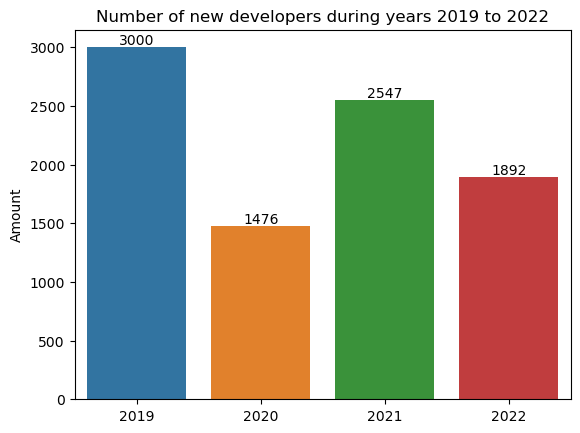

In [27]:
#Plot the data obtained
#Consulted Ressources: https://seaborn.pydata.org/generated/seaborn.barplot.html
#Consulted Ressources: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
#Consulted Ressources: https://www.python-graph-gallery.com/4-add-title-and-axis-label?utm_content=cmp-true
#Consulted Ressources: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
#Consulted Ressources: https://seaborn.pydata.org/tutorial/color_palettes.html

sns.color_palette("pastel")
chart_devs_divs = sns.barplot(data=devs_diffs)
plt.title("Number of new developers during years 2019 to 2022")
plt.ylabel("Amount")
plt.bar_label(chart_devs_divs.containers[0], label_type='edge')

Contrary to what I thought, the data show that there was no increase in the number of individuals who decided to start a career as a developer in the years following the pandemic. To my surprise, the number of new developers in 2022 (3000) had dropped by more than 1000 individuals, compared to the number of new developers in 2019 (3000).
Based on my surrounding experiences, I had formed the idea that many individuals had decided to change careers and start a career in IT development. Especially those with jobs affected by the pandemic in the service sector.
Is it possible that these individuals do not have the possibility to learn a new profession? Is it a question of age or gender?
To do so, I decided to explore two new concepts: Is there a difference between genders, and what is the average age of new developers?

Al contrario de lo que yo pensaba, los datos muestran que no hubo un incremento en el número de individuos que decidieron iniciar una carrera como desarrolladores en los años siguientes a la pandemia. Para mi sorpresa, el número de nuevos desarrolladores en 2022 (3000) había descendido en más de 1000 individuos, respecto al número de nuevos desarrolladores en 2019 (3000).
Basándome en las experiencias de mi entorno, había forjado la idea de que muchos individuos habían decidido cambiar de profesión e iniciar una carrera en el mundo del desarrollo informático. En especial, aquellos con trabajos afectados por la pandemia en el sector servicios.
¿Es posible que estos individuos no tengan la posibilidad de aprender una nueva profesión? ¿Es una cuestión de edad o de género?
Para ello decidí explorar dos nuevos conceptos: ¿Hay diferencias entre géneros? ¿Qué edad tienen de media los nuevos desarrolladores?

*Is there any difference between males and females? Did both follow the same pattern?*
*Existe alguna diferencia entre hombres y mujeres? Siguen el mismo patrón?*

In [24]:
#Amount of new developers in years 2019, 2020, 2021 and 2022 by gender
new_devs2019_m = df_2019dev.query(time_gender_filter)['MainBranch']. count()
new_devs2019_f = new_devs2019 - new_devs2019_m
print('New developers year 2019\n', 'Men:', new_devs2019_m,'\n','Women:', new_devs2019_f,'\n')

new_devs2020_m = df_2020dev.query(time_gender_filter)['MainBranch']. count()
new_devs2020_f = new_devs2020 - new_devs2020_m
print('New developers year 2020\n', 'Men:', new_devs2020_m,'\n','Women:', new_devs2020_f,'\n')

new_devs2021_m = df_2021dev.query(time_gender_filter)['MainBranch']. count()
new_devs2021_f = new_devs2021 - new_devs2021_m
print('New developers year 2021\n', 'Men:', new_devs2021_m,'\n','Women:', new_devs2021_f,'\n')

new_devs2022_m = df_2022dev.query(time_gender_filter)['MainBranch']. count()
new_devs2022_f = new_devs2022 - new_devs2022_m
print('New developers year 2019\n', 'Men:', new_devs2022_m,'\n','Women:', new_devs2022_f)


New developers year 2019
 Men: 2553 
 Women: 447 

New developers year 2020
 Men: 1265 
 Women: 211 

New developers year 2021
 Men: 2246 
 Women: 301 

New developers year 2019
 Men: 1672 
 Women: 220


In [25]:
#Merge the different dataframes ordered by year.
#Consulted Ressources: https://stackoverflow.com/questions/58141058/how-to-plot-a-grouped-bar-plot-from-two-or-more-dataframes

devs_diffs_m = pd.DataFrame({'Year':['2019','2020','2021','2022'],'Men':[new_devs2019_m, new_devs2020_m,new_devs2021_m,new_devs2022_m]})
devs_diffs_f = pd.DataFrame({'Year':['2019','2020','2021','2022'],'Women':[new_devs2019_f, new_devs2020_f,new_devs2021_f,new_devs2022_f]})
devs_diffs_gender= pd.concat([devs_diffs_m.set_index('Year'),devs_diffs_f.set_index('Year')],axis=1)
devs_diffs_gender

,Men,Women
Year,,
2019,2553,447
2020,1265,211
2021,2246,301
2022,1672,220


[Text(0, 0, '447'), Text(0, 0, '211'), Text(0, 0, '301'), Text(0, 0, '220')]

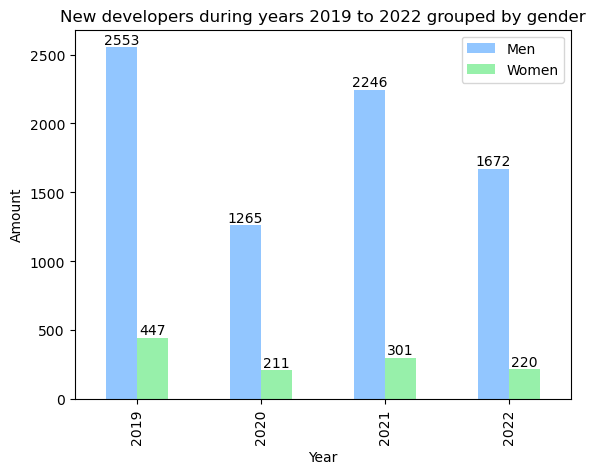

In [126]:
#Plot the comparison between women and men
barchart_gender_comparison = devs_diffs_gender.plot(kind='bar')
plt.title("New developers during years 2019 to 2022 grouped by gender")
plt.ylabel("Amount")
plt.bar_label(barchart_gender_comparison.containers[0], label_type='edge')
plt.bar_label(barchart_gender_comparison.containers[1], label_type='edge')

When exploring the numbers grouped by gender, I observed the same pattern as in the overall dataset. That is, although the proportion who decided to start a career in development is much lower than their male counterparts, the trend follows the same pattern. Decreasing in 2022 (220) to half as many women starting a career in IT development as in 2019 (447).
So what was happening, had the IT development world lost popularity?
In order to analyse this assumption, I decided to investigate the number of individuals who are new programming enthusiasts.

Al explorar los números agrupados por género, observé el mismo patrón que en el set de datos general. Es decir, aunque la proporción que decidieron iniciar una carrera en el mundo del desarrollo es mucho menor a la de sus colegas masculinos, la tendencia sigue el mismo patrón. Decrementando en 2022 (220) a la mitad de mujeres que iniciaron una carrera en el mundo del desarrollo informático, respecto a las que lo hacían en 2019 (447).
Así pues, qué ocurrió? Perdio popuaridad el desarrollo informático?
Con el objetivo de analizar esta suposición, decidí investigar el número de individuos nuevos aficionados a la programación.

*PART 3 - Did the IT-Development world lost popularity? What happened to the amount of new code enthusiasts?*
*PARTE 3 - Perdió popularidad el desarrollo informático? Qué ocurrió con el número de programadores aficionados?*

In [28]:
#Check MainBranch responses
df_2019['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

AQUI ESTOY

In [29]:
#********************************************************Year 2019***********************************************************
#I filter for the responses containing 'hobby' and 'learning', because those who have a work related to development
# answered 'I code primarily as a hobby' and 'I am a student who is learning to code'
df_2019hobby = df_2019[df_2019['MainBranch'].str.contains("hobby" and "learning", na = False)]

#Print first rows to check data consistency
df_2019hobby.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize,WorkRemote
0,I am a student who is learning to code,14.0,4,NaN,Man,NaN,NaN
1,I am a student who is learning to code,19.0,NaN,NaN,Man,NaN,NaN
11,I am a student who is learning to code,21.0,5,NaN,Woman,NaN,NaN
14,I am a student who is learning to code,20.0,3,NaN,Man,NaN,NaN
30,I am a student who is learning to code,NaN,Less than 1 year,NaN,Woman,NaN,NaN


In [30]:
#********************************************************Year 2020***********************************************************
#I filter for the responses containing 'hobby' and 'learning', because those who have a work related to development
# answered 'I code primarily as a hobby' and 'I am a student who is learning to code'
df_2020hobby = df_2020[df_2020['MainBranch'].str.contains("hobby" and "learning", na = False)]

#Print first rows to check data consistency
df_2020hobby.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize
14,I am a student who is learning to code,NaN,4,NaN,Man,NaN
20,I am a student who is learning to code,23.0,7,NaN,Man,NaN
27,I am a student who is learning to code,NaN,2,NaN,Man,NaN
28,I am a student who is learning to code,18.0,Less than 1 year,NaN,Man,NaN
34,I am a student who is learning to code,16.0,3,NaN,Woman,NaN


In [91]:
#********************************************************Year 2021***********************************************************
#I filter for the responses containing 'hobby' and 'learning', because those who have a work related to development
# answered 'I code primarily as a hobby' and 'I am a student who is learning to code'
df_2021hobby = df_2021[df_2021['MainBranch'].str.contains("hobby" and "learning", na = False)]

#Print first rows to check data consistency
df_2021hobby.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize
1,I am a student who is learning to code,18-24 years old,7,NaN,Man,NaN
5,I am a student who is learning to code,18-24 years old,NaN,NaN,Prefer not to say,NaN
7,I am a student who is learning to code,18-24 years old,4,NaN,Woman,NaN
13,I am a student who is learning to code,Prefer not to say,10,NaN,Prefer not to say,NaN
15,I am a student who is learning to code,Under 18 years old,7,NaN,Man,NaN


In [85]:
#********************************************************Year 2022***********************************************************
#I filter for the responses containing 'hobby' and 'learning', because those who have a work related to development
# answered 'I code primarily as a hobby' and 'I am a student who is learning to code'
df_2022hobby = df_2022[df_2022['MainBranch'].str.contains("hobby" and "learning", na = False)]

#Print first rows to check data consistency
df_2022hobby.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize,RemoteWork
19,I am learning to code,18-24 years old,2,NaN,Man,NaN,NaN
81,I am learning to code,35-44 years old,1,NaN,Man,NaN,Full in-person
106,I am learning to code,Under 18 years old,3,NaN,Man,NaN,NaN
110,I am learning to code,Under 18 years old,4,NaN,Man,NaN,NaN
118,I am learning to code,18-24 years old,2,NaN,Man,NaN,"Hybrid (some remote, some in-person)"


In [99]:
#Amount of individuals who decided to start coding in years 2019, 2020, 2021 and 2022 by gender

new_hobby2019 = df_2019hobby.query(time_filter_noob)['MainBranch']. count()
print('New code learners year 2019:', new_hobby2019)

new_hobby2020 = df_2020hobby.query(time_filter_noob)['MainBranch']. count()
print('New code learners year 2020:', new_hobby2020)

new_hobby2021 = df_2021hobby.query(time_filter_noob)['MainBranch']. count()
print('New code learners year 2021:', new_hobby2021)

new_hobby2022 = df_2022hobby.query(time_filter_noob)['MainBranch']. count()
print('New code learners year 2022:', new_hobby2022)

New code learners year 2019: 757
New code learners year 2020: 440
New code learners year 2021: 892
New code learners year 2022: 1041


In [180]:
#Create a dataframe with the obtainted data
hobby_diffs = pd.DataFrame([[new_hobby2019, new_hobby2020,new_hobby2021,new_hobby2022]],columns=['2019','2020','2021','2022'])
hobby_diffs

,2019,2020,2021,2022
0,757,440,892,1041


[Text(0, 0, '757'), Text(0, 0, '440'), Text(0, 0, '892'), Text(0, 0, '1041')]

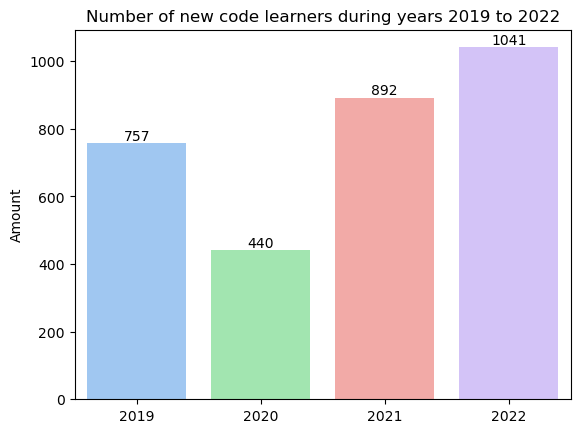

In [189]:
#Plot dataframe in the previous segment
sns.color_palette("pastel")
chart_hobby_divs = sns.barplot(data=hobby_diffs)
plt.title("Number of new code learners during years 2019 to 2022")
plt.ylabel("Amount")
plt.bar_label(chart_hobby_divs.containers[0], label_type='edge')

En este caso sí que se observa un aumento de individuos que tras la pandemia empezaron a programar por hobby o a causa de sus estudios. Con lo cual podemos confirmar que el interés general por el desarrollo de software creció.
Pero como hemos visto anteriormente, esta popularidad por el desarrollo de software no se ve reflejada en la evolución del número de nuevos programadores durante los años posteriores a 2020. ¿Puede tener relación con la edad de estos nuevos programadores? ¿Qué edad media tienen los nuevos aficionados y estudiantes de programación? ¿Y los nuevos desarrolladores profesionales? ¿Existe una relación entre la contratación de desarrolladores y su edad?

In this case, there is an increase in the number of individuals who started programming after the pandemic, either as a hobby or because of their studies. This confirms that the general interest in software development has grown.
But as we have seen above, this popularity for software development is not reflected in the evolution of the number of new programmers in the years after 2020. Can this be related to the age of these new programmers, what is the average age of new hobbyists and programming students, what is the average age of new professional developers, and is there a relationship between the recruitment of developers and their age?

In [124]:
new_hobby2019_age = round(df_2019hobby.query(time_filter_noob)['Age']. mean(),0)
print('Mean age of the new code learners 2019:', round(new_hobby2019_age,0))

new_hobby2020_age = round(df_2020hobby.query(time_filter_noob)['Age']. mean(),0)
print('Mean age of the new code learners 2020:', new_hobby2020_age)


Mean age of the new code learners 2019: 24.0
Mean age of the new code learners 2020: 25.0


In [93]:
#Check data in Age column in dataframe from 2021
df_2021hobby['Age'].value_counts()

18-24 years old       7684
Under 18 years old    2597
25-34 years old       1167
35-44 years old        199
Prefer not to say      112
45-54 years old         55
55-64 years old         15
65 years or older        8
Name: Age, dtype: int64

In [94]:
#As ages are clustered in string ranges. I change this string to an average age for every range.
df_2021hobby.loc[df_2021hobby['Age'].str.contains("Under 18 years old",na=False),'AgeNum']=18
df_2021hobby.loc[df_2021hobby['Age'].str.contains("18-24 years old",na=False),'AgeNum']=24
df_2021hobby.loc[df_2021hobby['Age'].str.contains("25-34 years old",na=False),'AgeNum']=34
df_2021hobby.loc[df_2021hobby['Age'].str.contains("35-44 years old",na=False),'AgeNum']=44
df_2021hobby.loc[df_2021hobby['Age'].str.contains("45-54 years old",na=False),'AgeNum']=54
df_2021hobby.loc[df_2021hobby['Age'].str.contains("55-64 years old",na=False),'AgeNum']=64
df_2021hobby.loc[df_2021hobby['Age'].str.contains("65 years or older",na=False),'AgeNum']=70
df_2021hobby.head()

C:\Users\DQXRWMH\AppData\Local\Temp\1\ipykernel_1636\3750089045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021hobby.loc[df_2021hobby['Age'].str.contains("Under 18 years old",na=False),'AgeNum']=18


,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize,AgeNum
1,I am a student who is learning to code,18-24 years old,7,NaN,Man,NaN,24.0
5,I am a student who is learning to code,18-24 years old,NaN,NaN,Prefer not to say,NaN,24.0
7,I am a student who is learning to code,18-24 years old,4,NaN,Woman,NaN,24.0
13,I am a student who is learning to code,Prefer not to say,10,NaN,Prefer not to say,NaN,NaN
15,I am a student who is learning to code,Under 18 years old,7,NaN,Man,NaN,18.0


In [95]:
#Check consistency.
df_2021hobby['AgeNum'].value_counts()

24.0    7684
18.0    2597
34.0    1167
44.0     199
54.0      55
64.0      15
70.0       8
Name: AgeNum, dtype: int64

In [122]:
#Print the mean age
new_hobby2021_age = round(df_2021hobby.query(time_filter_noob)['AgeNum']. mean(),0)
print('Mean age of the new code learners 2021:', round(new_hobby2021_age,0))

Mean age of the new code learners 2021: 25.0


In [86]:
#Check data in Age column in dataframe from 2022
df_2022hobby['Age'].value_counts()

18-24 years old       3450
Under 18 years old    1096
25-34 years old       1074
35-44 years old        320
45-54 years old        114
Prefer not to say       94
55-64 years old         41
65 years or older       17
Name: Age, dtype: int64

In [87]:
#As ages are clustered in string ranges. I change this string to an average age for every range.
df_2022hobby.loc[df_2022hobby['Age'].str.contains("Under 18 years old",na=False),'AgeNum']=18
df_2022hobby.loc[df_2022hobby['Age'].str.contains("18-24 years old",na=False),'AgeNum']=24
df_2022hobby.loc[df_2022hobby['Age'].str.contains("25-34 years old",na=False),'AgeNum']=34
df_2022hobby.loc[df_2022hobby['Age'].str.contains("35-44 years old",na=False),'AgeNum']=44
df_2022hobby.loc[df_2022hobby['Age'].str.contains("45-54 years old",na=False),'AgeNum']=54
df_2022hobby.loc[df_2022hobby['Age'].str.contains("55-64 years old",na=False),'AgeNum']=64
df_2022hobby.loc[df_2022hobby['Age'].str.contains("65 years or older",na=False),'AgeNum']=70
df_2022hobby.head()

C:\Users\DQXRWMH\AppData\Local\Temp\1\ipykernel_1636\4010749652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022hobby.loc[df_2022hobby['Age'].str.contains("Under 18 years old",na=False),'AgeNum']=18


,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize,RemoteWork,AgeNum
19,I am learning to code,18-24 years old,2,NaN,Man,NaN,NaN,24.0
81,I am learning to code,35-44 years old,1,NaN,Man,NaN,Full in-person,44.0
106,I am learning to code,Under 18 years old,3,NaN,Man,NaN,NaN,18.0
110,I am learning to code,Under 18 years old,4,NaN,Man,NaN,NaN,18.0
118,I am learning to code,18-24 years old,2,NaN,Man,NaN,"Hybrid (some remote, some in-person)",24.0


In [88]:
#Check consistency.
df_2022hobby['AgeNum'].value_counts()

24.0    3450
18.0    1096
34.0    1074
44.0     320
54.0     114
64.0      41
70.0      17
Name: AgeNum, dtype: int64

In [121]:
#Print the mean age year 2022
new_hobby2022_age = round(df_2022hobby.query(time_filter_noob)['AgeNum']. mean(),0)
print('Mean age of the new code learners 2022:', round(df_2022hobby_age,0))

Mean age of the new code learners 2022: 29.0


In [125]:
#Create a dataframe to plot the data
hobby_mean_age = pd.DataFrame([[new_hobby2019_age, new_hobby2020_age,new_hobby2021_age,new_hobby2022_age]],columns=['2019','2020','2021','2022'])
hobby_mean_age

,2019,2020,2021,2022
0,24.0,25.0,25.0,29.0


[Text(0, 0, '24'), Text(0, 0, '25'), Text(0, 0, '25'), Text(0, 0, '29')]

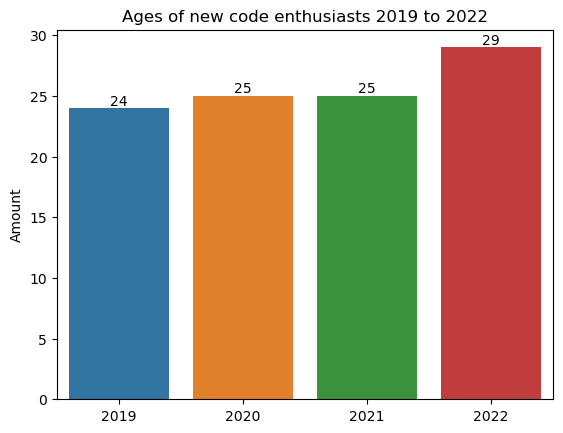

In [126]:
#Plot new hobby developers age's
sns.color_palette("pastel")
chart_hobby_mean_age = sns.barplot(data=hobby_mean_age)
plt.title("Ages of new code enthusiasts 2019 to 2022")
plt.ylabel("Amount")
plt.bar_label(chart_hobby_mean_age.containers[0], label_type='edge')

In [129]:
#Does it follow the same pattern of new professional developer's age?
new_devs2019_age = round(df_2019dev.query(time_filter)['Age']. mean(),0)
print('Age of the new professional developers year 2019:', new_devs2019_age)

new_devs2020_age = round(df_2020dev.query(time_filter)['Age']. mean(),0)
print('Age of the new professional developers year 2020:', new_devs2020_age)

Age of the new professional developers year 2019: 25.0
Age of the new professional developers year 2020: 25.0


In [115]:
#As ages are clustered in string ranges. I change this string to an average age for every range.
df_2021dev.loc[df_2021dev['Age'].str.contains("Under 18 years old",na=False),'AgeNum']=18
df_2021dev.loc[df_2021dev['Age'].str.contains("18-24 years old",na=False),'AgeNum']=24
df_2021dev.loc[df_2021dev['Age'].str.contains("25-34 years old",na=False),'AgeNum']=34
df_2021dev.loc[df_2021dev['Age'].str.contains("35-44 years old",na=False),'AgeNum']=44
df_2021dev.loc[df_2021dev['Age'].str.contains("45-54 years old",na=False),'AgeNum']=54
df_2021dev.loc[df_2021dev['Age'].str.contains("55-64 years old",na=False),'AgeNum']=64
df_2021dev.loc[df_2021dev['Age'].str.contains("65 years or older",na=False),'AgeNum']=70
df_2021dev.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize,AgeNum
4,I am a developer by profession,25-34 years old,17,10,Man,"Just me - I am a freelancer, sole proprietor, ...",34.0
8,I am a developer by profession,25-34 years old,6,4,Man,"10,000 or more employees",34.0
9,I am a developer by profession,25-34 years old,7,4,Man,10 to 19 employees,34.0
10,I am a developer by profession,25-34 years old,16,10,Man,"10,000 or more employees",34.0
11,I am a developer by profession,25-34 years old,12,5,Man,10 to 19 employees,34.0


In [130]:
#Print the mean age for new professional developers year 2022
new_devs2021_age = round( df_2021dev.query(time_filter)['AgeNum']. mean(),0)
print('Mean age of the new professional developers 2021:', df_2021dev_age)

Mean age of the new professional developers 2021: 28.0


In [117]:
#As ages are clustered in string ranges. I change this string to an average age for every range.
df_2022dev.loc[df_2022dev['Age'].str.contains("Under 18 years old",na=False),'AgeNum']=18
df_2022dev.loc[df_2022dev['Age'].str.contains("18-24 years old",na=False),'AgeNum']=24
df_2022dev.loc[df_2022dev['Age'].str.contains("25-34 years old",na=False),'AgeNum']=34
df_2022dev.loc[df_2022dev['Age'].str.contains("35-44 years old",na=False),'AgeNum']=44
df_2022dev.loc[df_2022dev['Age'].str.contains("45-54 years old",na=False),'AgeNum']=54
df_2022dev.loc[df_2022dev['Age'].str.contains("55-64 years old",na=False),'AgeNum']=64
df_2022dev.loc[df_2022dev['Age'].str.contains("65 years or older",na=False),'AgeNum']=70
df_2022dev.head()

,MainBranch,Age,YearsCode,YearsCodePro,Gender,OrgSize,RemoteWork,AgeNum
2,"I am not primarily a developer, but I write co...",25-34 years old,14,5,Man,20 to 99 employees,"Hybrid (some remote, some in-person)",34.0
3,I am a developer by profession,35-44 years old,20,17,Man,100 to 499 employees,Fully remote,44.0
8,I am a developer by profession,25-34 years old,6,6,Woman,I don’t know,"Hybrid (some remote, some in-person)",34.0
9,I am a developer by profession,45-54 years old,37,30,Woman,"Just me - I am a freelancer, sole proprietor, ...",Fully remote,54.0
10,I am a developer by profession,18-24 years old,5,2,Man,100 to 499 employees,"Hybrid (some remote, some in-person)",24.0


In [131]:
#Print the mean age for new professional developers year 2022
new_devs2022_age = round( df_2022dev.query(time_filter)['AgeNum']. mean(),0)
print('Mean age of the new professional developers 2022:', df_2022dev_age)

Mean age of the new professional developers 2022: 29.0


In [133]:
#Create a dataframe to plot the data
devs_mean_age = pd.DataFrame([[new_devs2019_age, new_devs2020_age,new_devs2021_age,new_devs2022_age]],columns=['2019','2020','2021','2022'])
devs_mean_age

,2019,2020,2021,2022
0,25.0,25.0,28.0,29.0


In [136]:
#Prepare the age's comparison to be plotted together
age_diffs_hobby = pd.DataFrame({'Year':['2019','2020','2021','2022'],'Hobby':[new_hobby2019_age, new_hobby2020_age,new_hobby2021_age,new_hobby2022_age]})
age_diffs_devs = pd.DataFrame({'Year':['2019','2020','2021','2022'],'Professional':[new_devs2019_age, new_devs2020_age,new_devs2021_age,new_devs2022_age]})
age_diffs_type= pd.concat([age_diffs_hobby.set_index('Year'),age_diffs_devs.set_index('Year')],axis=1)
age_diffs_type

,Hobby,Professional
Year,,
2019,24.0,25.0
2020,25.0,25.0
2021,25.0,28.0
2022,29.0,29.0


[Text(0, 0, '25'), Text(0, 0, '25'), Text(0, 0, '28'), Text(0, 0, '29')]

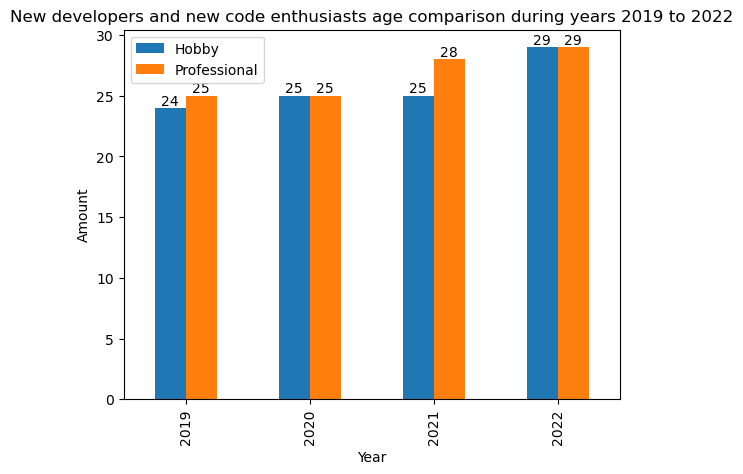

In [137]:
#Plot the comparison
barchart_age_comparison = age_diffs_type.plot(kind='bar')
plt.title("New developers and new code enthusiasts age comparison during years 2019 to 2022")
plt.ylabel("Amount")
plt.bar_label(barchart_age_comparison.containers[0], label_type='edge')
plt.bar_label(barchart_age_comparison.containers[1], label_type='edge')

Tras analizar las edades medias, observamos que tanto la rama profesional como la amateur, siguen un mismo patrón. Durante los años 2019 y 2020, tanto los nuevos aficionados como los nuevos desarrolladores profesionales tenían una media de edad de 25 años. Pero a partir de 2021 la edad de los programadores profesionales se elevó hasta los 29 años. ¿Cambiaron los parámetros de contratación tras la pandemia? ¿Puede algún factor explicar esta variación? ¿Qué relación existe entre edad y contratación?
Para tratar de responder a esta cuestión y ver si existe una relación entre edad y empleo realizaremos un análisis mediante regresión lineal.

After analysing the average ages, we observe that both the professional and amateur branches follow the same pattern. During 2019 and 2020, both new amateurs and new professional developers had an average age of 25 years. But from 2021 onwards, the age of professional programmers rose to 29. Did the hiring parameters change after the pandemic, and can any factor explain this variation? What is the relationship between age and hiring?
To try to answer this question and see if there is a relationship between age and employment, we will conduct a linear regression analysis.

*PART 4 - Analyzing correlation between age and employment*
*PARTE 4 - Analisis de correlación entre edad y empleo*

*DATASET 2019*

In [238]:
#Clean the data of 2019. We take just the columns that will answer to our questions and clean the missing values.
df_2019 = df_2019raw[['MainBranch','Age', 'YearsCode','YearsCodePro','Employment']]

#I filter for the responses containing 'I am' and 'developer', because those who have a work related to development
# answered 'I am a developer by profession' and 'I am not primarly a developer, but I write code as a part of my job'
df_2019_dev = df_2019[df_2019_corr['MainBranch'].str.contains("developer" and "I am", na = False)]

#Print first rows to check data consistency
c.head()

,MainBranch,Age,YearsCode,YearsCodePro,Employment
0,I am a student who is learning to code,14.0,4,NaN,"Not employed, and not looking for work"
1,I am a student who is learning to code,19.0,NaN,NaN,"Not employed, but looking for work"
2,"I am not primarily a developer, but I write co...",28.0,3,1,Employed full-time
3,I am a developer by profession,22.0,3,Less than 1 year,Employed full-time
4,I am a developer by profession,30.0,16,9,Employed full-time


In [239]:
#Checking for null values
df_2019_dev[['Age', 'Employment']].isnull().sum()

Age           8493
Employment    1172
dtype: int64

In [240]:
#Cleaning nan values in the columns of interest
df_2019_dev_clean =df_2019_dev.dropna(subset=['Age', 'Employment'])
df_2019_dev_clean

,MainBranch,Age,YearsCode,YearsCodePro,Employment
0,I am a student who is learning to code,14.0,4,NaN,"Not employed, and not looking for work"
1,I am a student who is learning to code,19.0,NaN,NaN,"Not employed, but looking for work"
2,"I am not primarily a developer, but I write co...",28.0,3,1,Employed full-time
3,I am a developer by profession,22.0,3,Less than 1 year,Employed full-time
4,I am a developer by profession,30.0,16,9,Employed full-time
...,...,...,...,...,...
88324,I am a developer by profession,48.0,31,28,Employed full-time
88325,I am a developer by profession,26.0,12,3,Employed full-time
88326,I am a developer by profession,34.0,17,7,Employed full-time
88328,I am a developer by profession,37.0,18,9,Employed full-time


In [241]:
# As employment is categorical, we have to create a dummy column to is different responses
employment_2019_dummies =pd.get_dummies(df_2019_dev_clean['Employment'], dummy_na=True)
employment_2019_dummies

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,NaN
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
88324,1,0,0,0,0,0,0
88325,1,0,0,0,0,0,0
88326,1,0,0,0,0,0,0
88328,1,0,0,0,0,0,0


In [266]:
#Joining the dummy variables to out dataframe
df_2019dev_joined = df_2019_dev_clean.join(employment_dummies)
df_2019dev_joined.columns

Index([                                          'MainBranch',
                                                        'Age',
                                                  'YearsCode',
                                               'YearsCodePro',
                                                 'Employment',
                                         'Employed full-time',
                                         'Employed part-time',
       'Independent contractor, freelancer, or self-employed',
                     'Not employed, and not looking for work',
                         'Not employed, but looking for work',
                                                    'Retired',
                                                          nan],
      dtype='object')

In [243]:
#Perform the linear regression with our variables of interest and printing the results
df_2019dev_joined['intercept'] = 1
lm = sm.OLS(df_2019dev_joined['Age'], df_2019dev_joined[['intercept', 'Employed full-time','Employed part-time','Independent contractor, freelancer, or self-employed']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2439.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:56:13   Log-Likelihood:            -2.6268e+05
No. Observations:               74157   AIC:                         5.254e+05
Df Residuals:                   74153   BIC:                         5.254e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
intercept                                               23.5198      0.103    228.273      0.000      23.318      23.722
Employed full-time                                       7.7074      0.109     70.817      0.000       7.494       7.921
Employed part-time                                       1.6568      0.171      9.702      0.000       1.322       1.992
Independent contractor, freelancer, or self-employed     9.7657      0.144     67.987      0.000       9.484      10.047
==============================================================================
Omnibus:                    22259.073   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79187.685
Skew:                           1.495   Prob(JB):                         0.00
Kurtosis:                       7.086   Cond. No.                         9.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los resultados de la regresión lineal muestran que existe una relación estadísticamente significativa entre la edad y el tipo de empleo. El valor R-cuadrado ajustado de 0,090 indica que aproximadamente el 9% de la variabilidad de la edad puede explicarse por el tipo de empleo.

Los coeficientes de los tres tipos de empleo muestran la diferencia de edad esperada entre cada tipo de empleo.

Los valores p de cada coeficiente son muy pequeños (inferiores a 0,0001), lo que indica que cada tipo de empleo es un predictor significativo de la edad. En otras palabras, hay pruebas sólidas que sugieren que el tipo de empleo está relacionado con la edad.

En general, los resultados sugieren que existe una relación entre la edad y el tipo de empleo, pero cabe señalar que el valor R-cuadrado ajustado es bastante bajo, lo que indica que el tipo de empleo por sí solo no explica una gran parte de la variabilidad de la edad. Otros factores, como la educación, los ingresos y el sexo, también pueden desempeñar un papel determinante.

Age = 23.5198 + 7.7074*(Employed full-time) + 1.6568*(Employed part-time) + 9.7657*(Independent contractor, freelancer, or self-employed)

The results of the linear regression show that there is a statistically significant relationship between age and type of employment. The adjusted R-squared value of 0.090 indicates that approximately 9% of the variability in age can be explained by employment type.

The coefficients for the three job types show the expected age difference between each job type.

The p-values of each coefficient are very small (less than 0.0001), indicating that each type of employment is a significant predictor of age. In other words, there is strong evidence to suggest that job type is related to age.

Overall, the results suggest that there is a relationship between age and job type, but it should be noted that the adjusted R-squared value is quite low, indicating that job type alone does not explain much of the variability in age. Other factors, such as education, income and gender, may also play a determining role.

Age = 23.5198 + 7.7074*(Employed full-time) + 1.6568*(Employed part-time) + 9.7657*(Independent contractor, freelancer, or self-employed)

*DATASET 2022*

In [267]:
#Clean the data of 2020. We take just the columns that will answer to our questions and clean the missing values.
df_2022 = df_2022raw[['MainBranch','Age','Employment', 'YearsCode','YearsCodePro']]

#I filter for the responses containing 'I am' and 'developer', because those who have a work related to development
# answered 'I am a developer by profession' and 'I am not primarly a developer, but I write code as a part of my job'
df_2022dev = df_2022[df_2022['MainBranch'].str.contains("developer" and "I am", na = False)]

#Clean NaN values
df_2022dev = df_2022dev.dropna(axis=0)

#Print first rows to check data consistency
df_2022dev.head()

,MainBranch,Age,Employment,YearsCode,YearsCodePro
2,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time",14,5
3,I am a developer by profession,35-44 years old,"Employed, full-time",20,17
4,I am a developer by profession,25-34 years old,"Employed, full-time",8,3
8,I am a developer by profession,25-34 years old,"Employed, full-time",6,6
9,I am a developer by profession,45-54 years old,"Independent contractor, freelancer, or self-em...",37,30


In [268]:
df_2022dev['Employment'].value_counts()

Employed, full-time                                                                             40638
Independent contractor, freelancer, or self-employed                                             4463
Employed, full-time;Independent contractor, freelancer, or self-employed                         3387
Employed, part-time                                                                               920
Independent contractor, freelancer, or self-employed;Employed, part-time                          314
Employed, full-time;Employed, part-time                                                           211
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      176
I prefer not to say                                                                               134
Retired                                                                                            78
Independent contractor, freelancer, or self-employed;Retired                      

In [246]:
#As we can see in the previous cell, this year employment had multi-option response. In order to sum up
#employment status we summarize the responses in 4 criteria.
df_2022dev.loc[df_2022dev['Employment'].str.contains("full-time",na=False),'EmploySum']='Employed full-time'
df_2022dev.loc[df_2022dev['Employment'].str.contains("part-time",na=False),'EmploySum']='Employed part-time'
df_2022dev.loc[df_2022dev['Employment'].str.contains("freelancer",na=False),'EmploySum']='Other'
df_2022dev.loc[df_2022dev['Employment'].str.contains(";Retired",na=False),'EmploySum']='Retired'
df_2022dev.head()

,MainBranch,Age,Employment,YearsCode,YearsCodePro,Gender,OrgSize,RemoteWork,EmploySum
2,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time",14,5,Man,20 to 99 employees,"Hybrid (some remote, some in-person)",Employed full-time
3,I am a developer by profession,35-44 years old,"Employed, full-time",20,17,Man,100 to 499 employees,Fully remote,Employed full-time
8,I am a developer by profession,25-34 years old,"Employed, full-time",6,6,Woman,I don’t know,"Hybrid (some remote, some in-person)",Employed full-time
9,I am a developer by profession,45-54 years old,"Independent contractor, freelancer, or self-em...",37,30,Woman,"Just me - I am a freelancer, sole proprietor, ...",Fully remote,Other
10,I am a developer by profession,18-24 years old,"Employed, full-time",5,2,Man,100 to 499 employees,"Hybrid (some remote, some in-person)",Employed full-time


In [247]:
#As we have seen in the previous analysis, ages are clustered in string ranges. 
#I change this string to an average age for every range and store it into a new column.
df_2022dev.loc[df_2022dev['Age'].str.contains("Under 18 years old",na=False),'AgeNum']=18
df_2022dev.loc[df_2022dev['Age'].str.contains("18-24 years old",na=False),'AgeNum']=24
df_2022dev.loc[df_2022dev['Age'].str.contains("25-34 years old",na=False),'AgeNum']=34
df_2022dev.loc[df_2022dev['Age'].str.contains("35-44 years old",na=False),'AgeNum']=44
df_2022dev.loc[df_2022dev['Age'].str.contains("45-54 years old",na=False),'AgeNum']=54
df_2022dev.loc[df_2022dev['Age'].str.contains("55-64 years old",na=False),'AgeNum']=64
df_2022dev.loc[df_2022dev['Age'].str.contains("65 years or older",na=False),'AgeNum']=70
df_2022dev.head()

,MainBranch,Age,Employment,YearsCode,YearsCodePro,Gender,OrgSize,RemoteWork,EmploySum,AgeNum
2,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time",14,5,Man,20 to 99 employees,"Hybrid (some remote, some in-person)",Employed full-time,34.0
3,I am a developer by profession,35-44 years old,"Employed, full-time",20,17,Man,100 to 499 employees,Fully remote,Employed full-time,44.0
8,I am a developer by profession,25-34 years old,"Employed, full-time",6,6,Woman,I don’t know,"Hybrid (some remote, some in-person)",Employed full-time,34.0
9,I am a developer by profession,45-54 years old,"Independent contractor, freelancer, or self-em...",37,30,Woman,"Just me - I am a freelancer, sole proprietor, ...",Fully remote,Other,54.0
10,I am a developer by profession,18-24 years old,"Employed, full-time",5,2,Man,100 to 499 employees,"Hybrid (some remote, some in-person)",Employed full-time,24.0


In [248]:
#Checking for null values
df_2022dev.isnull().sum()

MainBranch        0
Age               0
Employment        0
YearsCode         0
YearsCodePro      0
Gender            0
OrgSize           0
RemoteWork        0
EmploySum         0
AgeNum          160
dtype: int64

In [249]:
#Cleaning null values in the new column AgeNum
df_2022dev_clean= df_2022dev.dropna(subset=['AgeNum'])

In [250]:
#Check for null values again
df_2022dev_clean.isnull().sum()

MainBranch      0
Age             0
Employment      0
YearsCode       0
YearsCodePro    0
Gender          0
OrgSize         0
RemoteWork      0
EmploySum       0
AgeNum          0
dtype: int64

In [251]:
# As employment is a categorical variable, we have to create a dummy column to is different responses
employment_2022_dummies =pd.get_dummies(df_2022dev_clean['EmploySum'])
employment_2022_dummies

,Employed full-time,Employed part-time,Other,Retired
2,1,0,0,0
3,1,0,0,0
8,1,0,0,0
9,0,0,1,0
10,1,0,0,0
...,...,...,...,...
73261,1,0,0,0
73263,1,0,0,0
73264,1,0,0,0
73265,1,0,0,0


In [252]:
#Join dummies to our dataframe
df_2022dev_joined = df_2022dev_clean.join(employment_2022_dummies)
df_2022dev_joined.columns

Index(['MainBranch', 'Age', 'Employment', 'YearsCode', 'YearsCodePro',
       'Gender', 'OrgSize', 'RemoteWork', 'EmploySum', 'AgeNum',
       'Employed full-time', 'Employed part-time', 'Other', 'Retired'],
      dtype='object')

In [253]:
#Perform the linear regression
df_2022dev_joined['intercept'] = 1
lm2 = sm.OLS(df_2022dev_joined['AgeNum'], df_2022dev_joined[['intercept', 'Employed full-time','Employed part-time','Other']])
results2 = lm2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AgeNum   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          5.78e-140
Time:                        13:57:16   Log-Likelihood:            -1.8355e+05
No. Observations:               49657   AIC:                         3.671e+05
Df Residuals:                   49653   BIC:                         3.671e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             62.3226      1.751     35.583      0.000      58.890      65.756
Employed full-time   -24.5273      1.752    -13.998      0.000     -27.962     -21.093
Employed part-time   -25.9086      1.776    -14.591      0.000     -29.389     -22.428
Other                -22.0981      1.755    -12.593      0.000     -25.537     -18.659
==============================================================================
Omnibus:                     4157.771   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5320.328
Skew:                           0.756   Prob(JB):                         0.00
Kurtosis:                       3.536   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Según los datos de 2022 parece haber una relación muy débil entre edad y tipo de trabajo. La R cuadrada es de 0,0013. Es decir, una variación del 1,3% entre edad y tipo de trabajo.
Para hacer la regresión, se tuvieron que manipular las columnas 'Age' y 'Employment' y sustituir sus rangos por un valor concreto. Es posible que esto haya modificado sustancialmente nuestros datos y el análisis no sea significativo respecto a nuestra muestra. Por este motivo, se analizan también los datos de 2021.

According to the 2022 data, there seems to be a very weak relationship between age and type of work. The R-squared is 0.0013. That is, a variation of 1.3% between age and type of work.
To run the regression, the columns 'Age' and 'Employment' had to be manipulated, and their ranges replaced by a specific value. This may have changed our data substantially, and the analysis may not be meaningful for our sample. For this reason, the data for 2021 are also analysed.

*DATA 2021 - Check if results from 2022 makes sense*
*DATOS 2021 - Comprobamos si los resultados de 2022 tienen sentido*

In [269]:
#Clean the data of 2021. We take just the columns that will answer to our questions and clean the missing values.
df_2021 = df_2021raw[['MainBranch','Age','Employment', 'YearsCode','YearsCodePro']]

#I filter for the responses containing 'I am' and 'developer', because those who have a work related to development
# answered 'I am a developer by profession' and 'I am not primarly a developer, but I write code as a part of my job'
df_2021dev = df_2021[df_2021['MainBranch'].str.contains("developer" and "I am", na = False)]

#Clean NaN values
df_2021dev = df_2021dev.dropna(axis=0)

#Print first rows to check data consistency
df_2021dev.head()

,MainBranch,Age,Employment,YearsCode,YearsCodePro
4,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em...",17,10
8,I am a developer by profession,25-34 years old,Employed part-time,6,4
9,I am a developer by profession,25-34 years old,Employed full-time,7,4
10,I am a developer by profession,25-34 years old,Employed full-time,16,10
11,I am a developer by profession,25-34 years old,Employed full-time,12,5


In [270]:
#Check values in Employment column
df_2021dev['Employment'].value_counts()

Employed full-time                                      50231
Independent contractor, freelancer, or self-employed     6992
Employed part-time                                       1850
I prefer not to say                                       167
Retired                                                    73
Name: Employment, dtype: int64

In [271]:
#As seen above, ages are clustered in string ranges. I change this string to an average age for every range.
df_2021dev.loc[df_2021dev['Age'].str.contains("Under 18 years old",na=False),'AgeNum']=18
df_2021dev.loc[df_2021dev['Age'].str.contains("18-24 years old",na=False),'AgeNum']=24
df_2021dev.loc[df_2021dev['Age'].str.contains("25-34 years old",na=False),'AgeNum']=34
df_2021dev.loc[df_2021dev['Age'].str.contains("35-44 years old",na=False),'AgeNum']=44
df_2021dev.loc[df_2021dev['Age'].str.contains("45-54 years old",na=False),'AgeNum']=54
df_2021dev.loc[df_2021dev['Age'].str.contains("55-64 years old",na=False),'AgeNum']=64
df_2021dev.loc[df_2021dev['Age'].str.contains("65 years or older",na=False),'AgeNum']=70
df_2021dev.head()

,MainBranch,Age,Employment,YearsCode,YearsCodePro,AgeNum
4,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em...",17,10,34.0
8,I am a developer by profession,25-34 years old,Employed part-time,6,4,34.0
9,I am a developer by profession,25-34 years old,Employed full-time,7,4,34.0
10,I am a developer by profession,25-34 years old,Employed full-time,16,10,34.0
11,I am a developer by profession,25-34 years old,Employed full-time,12,5,34.0


In [258]:
#Check null values
df_2021dev.isnull().sum()

MainBranch        0
Age               0
Employment        0
YearsCode         0
YearsCodePro      0
AgeNum          200
dtype: int64

In [259]:
#Clean null values in AgeNum column
df_2021dev_clean= df_2021dev.dropna(subset=['AgeNum'])

In [260]:
#Check null values again
df_2021dev_clean.isnull().sum()

MainBranch      0
Age             0
Employment      0
YearsCode       0
YearsCodePro    0
AgeNum          0
dtype: int64

In [261]:
#As employment is categorical, we have to create a dummy column to is different responses
employment_2021_dummies =pd.get_dummies(df_2021dev_clean['Employment'])
employment_2021_dummies

,Employed full-time,Employed part-time,I prefer not to say,"Independent contractor, freelancer, or self-employed",Retired
4,0,0,0,1,0
8,0,1,0,0,0
9,1,0,0,0,0
10,1,0,0,0,0
11,1,0,0,0,0
...,...,...,...,...,...
83434,1,0,0,0,0
83435,0,0,0,1,0
83436,1,0,0,0,0
83437,1,0,0,0,0


In [262]:
#Join the new dummies to our dataframe
df_2021dev_joined = df_2021dev_clean.join(employment_2021_dummies)
df_2021dev_joined.columns

Index(['MainBranch', 'Age', 'Employment', 'YearsCode', 'YearsCodePro',
       'AgeNum', 'Employed full-time', 'Employed part-time',
       'I prefer not to say',
       'Independent contractor, freelancer, or self-employed', 'Retired'],
      dtype='object')

In [263]:
#Perform the linear regression
df_2021dev_joined['intercept'] = 1
lm3 = sm.OLS(df_2021dev_joined['AgeNum'], df_2021dev_joined[['intercept', 'Employed full-time','Employed part-time','Independent contractor, freelancer, or self-employed']])
results3 = lm3.fit()
results3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AgeNum   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     437.2
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          5.63e-281
Time:                        14:03:09   Log-Likelihood:            -2.1672e+05
No. Observations:               59113   AIC:                         4.334e+05
Df Residuals:                   59109   BIC:                         4.335e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
intercept                                               45.6951      0.634     72.119      0.000      44.453      46.937
Employed full-time                                      -8.7743      0.635    -13.817      0.000     -10.019      -7.530
Employed part-time                                     -13.6962      0.671    -20.417      0.000     -15.011     -12.381
Independent contractor, freelancer, or self-employed    -5.8761      0.644     -9.129      0.000      -7.138      -4.614
==============================================================================
Omnibus:                     4969.163   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6434.735
Skew:                           0.745   Prob(JB):                         0.00
Kurtosis:                       3.628   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El segundo análisis, con los datos de 2021, proporciona resultados ligeramente mejores, pero sigue siendo una relación débil. Según los datos existe una relación pequeña pero estadísticamente significativa entre la edad y el tipo de empleo.
Como ya vimos, en general, estos análisis sugieren que la edad y el tipo de empleo están relacionados, pero que otros factores pueden influir más en el tipo de empleo.

The second analysis, with data from 2021, provides slightly better results, but still a weak relationship. According to the data, there is a small but statistically significant relationship between age and type of employment.
As we have already seen, in general, these analyses suggest that age and type of employment are related, but that other factors may have a stronger influence on the type of employment.

*CONCLUSIONES*
Pese a que desde fuera del sector percibimos que el mundo del desarrollo IT está en auge y vemos cada vez más personas reciclarse e irrumpir en el sector, estos datos no han sido significativos a los trasladados en la encuesta de Srtackoverflow.
Respecto al mundo del desarrollo amateur, sí que podemos observar un interés creciente, pero este no ha sido traducido en contrataciones de nuevos desarrolladores profesionales tras la pandemia.
Tampoco hemos visto un cambio significativo en la edad media de los nuevos programadores profesionales, lo cual indicaría que algunos individuos han decidido cambiar de profesión. 
No obstante, los resultados de nuestras regresiones lineales, muestran que tras la pandemia no existe una fuerte correlación entre la edad y el tipo de empleo, por lo que esto podría significar que los criterios de selección se han ampliado tras la pandemia. Dando cabida así a más diversidad en la mano de obra de los desarrolladores software.

*CONCLUSIONS*
Although from outside the sector we perceive that the IT development world is booming, and we see more and more people retraining and breaking into the sector, these data have not been significant to those reported in the Stackoverflow survey.
Regarding the amateur development world, we can observe a growing interest, but this has not been translated into new professional developer hires after the pandemic.
Nor have we seen a significant change in the average age of new professional programmers, which would indicate that some individuals have decided to change careers. 
The results of our linear regressions, however, show that after the pandemic there is no strong correlation between age and type of employment, so this could mean that the selection criteria have broadened after the pandemic. Thus allowing for more diversity in the software developer workforce.